In [1]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [3]:
!gdown 1KSeVjK1-CjvcZlkV4yfCdoDRXWyz7lLL

Downloading...
From: https://drive.google.com/uc?id=1KSeVjK1-CjvcZlkV4yfCdoDRXWyz7lLL
To: /content/test1.zip
100% 284M/284M [00:05<00:00, 56.6MB/s]


In [4]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-12-09 11:39:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   202MB/s    in 0.3s    

2022-12-09 11:39:14 (202 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
import zipfile


local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [6]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'vectorize.py', 'train']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [9]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [10]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.914.jpg', 'cat.337.jpg', 'cat.974.jpg', 'cat.169.jpg', 'cat.524.jpg', 'cat.292.jpg', 'cat.884.jpg', 'cat.285.jpg', 'cat.272.jpg', 'cat.992.jpg']
['dog.532.jpg', 'dog.917.jpg', 'dog.118.jpg', 'dog.858.jpg', 'dog.25.jpg', 'dog.677.jpg', 'dog.379.jpg', 'dog.178.jpg', 'dog.382.jpg', 'dog.287.jpg']


In [11]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [12]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 

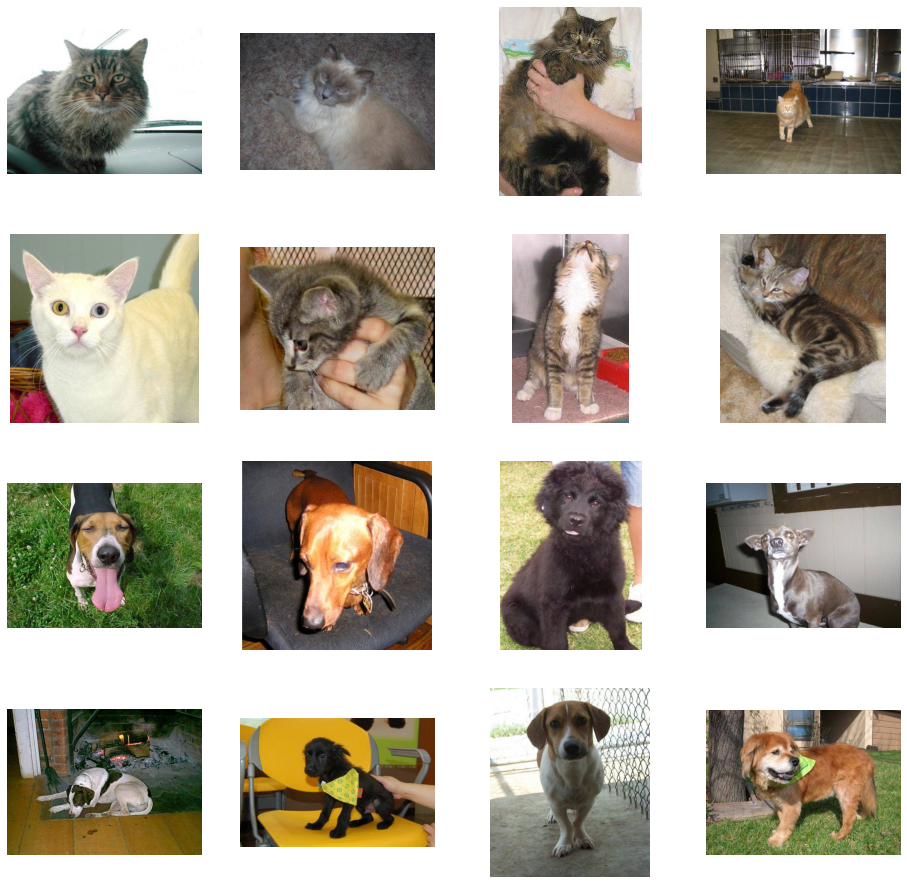

In [13]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
100/100 - 61s - loss: 0.8482 - accuracy: 0.5280 - val_loss: 0.9135 - val_accuracy: 0.5000 - 61s/epoch - 609ms/step
Epoch 2/15
100/100 - 60s - loss: 0.6615 - accuracy: 0.6335 - val_loss: 0.5968 - val_accuracy: 0.6840 - 60s/epoch - 602ms/step
Epoch 3/15
100/100 - 56s - loss: 0.5816 - accuracy: 0.7035 - val_loss: 0.5980 - val_accuracy: 0.6910 - 56s/epoch - 564ms/step
Epoch 4/15
100/100 - 56s - loss: 0.4892 - accuracy: 0.7655 - val_loss: 0.5451 - val_accuracy: 0.7420 - 56s/epoch - 562ms/step
Epoch 5/15
100/100 - 56s - loss: 0.4125 - accuracy: 0.8090 - val_loss: 0.6128 - val_accuracy: 0.7200 - 56s/epoch - 562ms/step
Epoch 6/15
100/100 - 59s - loss: 0.3361 - accuracy: 0.8495 - val_loss: 0.6589 - val_accuracy: 0.7120 - 59s/epoch - 589ms/step
Epoch 7/15
100/100 - 60s - loss: 0.2795 - accuracy: 0.8925 - val_loss: 0.7062 - val_accuracy: 0.7060 - 60s/epoch - 600ms/step
Epoch 8/15
100/100 - 56s - loss: 0.1830 - accuracy: 0.9250 - val_loss: 0.8842 - val_accuracy: 0.7140 - 56s/epoch - 562

In [20]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving corgi-g542fc38d5_640.jpg to corgi-g542fc38d5_640.jpg
1/1 [==============================] - 0s 28ms/step
[0.99985737]
corgi-g542fc38d5_640.jpg is a dog


1/1 [==============================] - 0s 90ms/step


<ipython-input-22-85526b5a5c33>:33: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


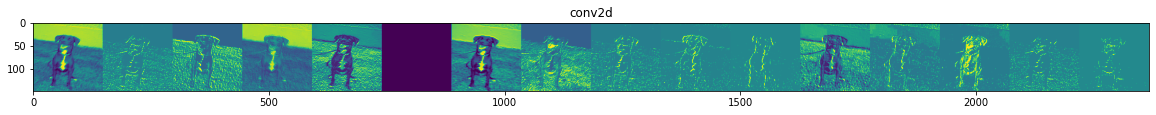

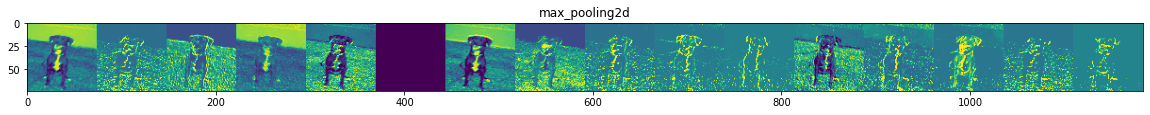

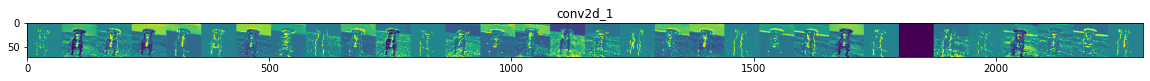

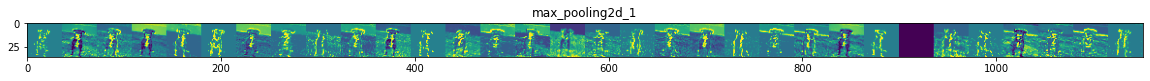

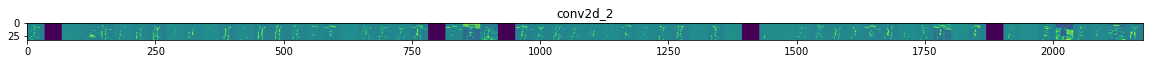

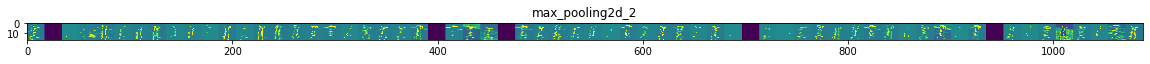

In [22]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)                   

x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1] 
    size       = feature_map.shape[ 1] 
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x 

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

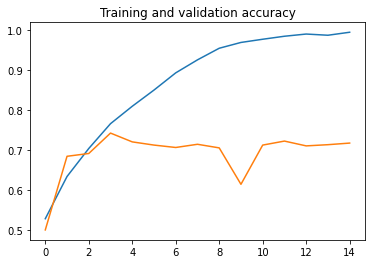

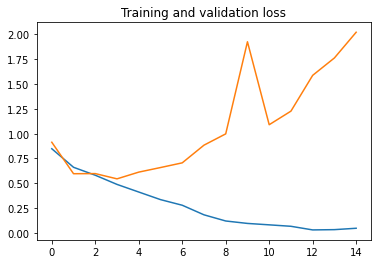

In [23]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

After 3rd epoch the validation accuracy doesnt go up any further

In [26]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

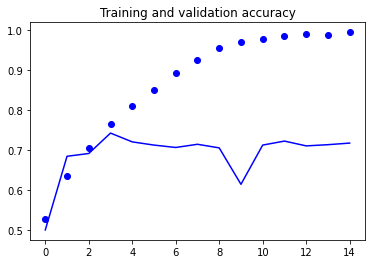

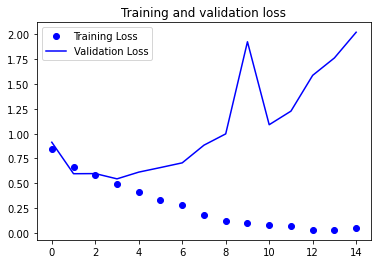

In [27]:
plot_loss_acc(history)

Since the training accuracy is going up to 100 percent but validation is stuck at 75 percent, we are overfitting

In [29]:
import tensorflow as tf

model_augmented = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [30]:
from tensorflow.keras.optimizers import RMSprop

model_augmented.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [31]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=20,

        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
history_augmented = model_augmented.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

Epoch 1/15
100/100 - 68s - loss: 0.7473 - accuracy: 0.5520 - val_loss: 0.6659 - val_accuracy: 0.6150 - 68s/epoch - 679ms/step
Epoch 2/15
100/100 - 71s - loss: 0.6840 - accuracy: 0.5610 - val_loss: 0.6117 - val_accuracy: 0.6880 - 71s/epoch - 708ms/step
Epoch 3/15
100/100 - 66s - loss: 0.6674 - accuracy: 0.6330 - val_loss: 0.6491 - val_accuracy: 0.6500 - 66s/epoch - 655ms/step
Epoch 4/15
100/100 - 65s - loss: 0.6255 - accuracy: 0.6500 - val_loss: 0.7040 - val_accuracy: 0.6240 - 65s/epoch - 653ms/step
Epoch 5/15
100/100 - 65s - loss: 0.6359 - accuracy: 0.6570 - val_loss: 0.5944 - val_accuracy: 0.6730 - 65s/epoch - 653ms/step
Epoch 6/15
100/100 - 68s - loss: 0.6059 - accuracy: 0.6845 - val_loss: 0.5502 - val_accuracy: 0.7040 - 68s/epoch - 680ms/step
Epoch 7/15
100/100 - 65s - loss: 0.6093 - accuracy: 0.6755 - val_loss: 0.5543 - val_accuracy: 0.7140 - 65s/epoch - 650ms/step
Epoch 8/15
100/100 - 65s - loss: 0.6069 - accuracy: 0.6830 - val_loss: 0.5507 - val_accuracy: 0.7040 - 65s/epoch - 653

In [34]:
def plot_loss_acc(history_augmented):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history_augmented.history['accuracy']
  val_acc = history_augmented.history['val_accuracy']
  loss = history_augmented.history['loss']
  val_loss = history_augmented.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

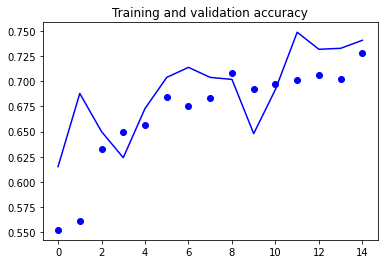

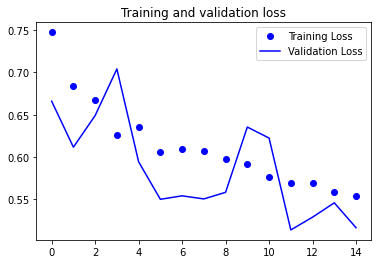

In [35]:
plot_loss_acc(history_augmented)

So we have reduced overfitting drastically by augmenting our training data